In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
path = "c:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False
#plot에 한글 넣기 위해 해야됨.

power = pd.read_excel('data/시도별_용도별.xls')

In [116]:
# '구분'으로 안해놓으면 0, 1, 2 이렇게 되서, 지역별로 행명 지정. inplace는 현 데이터에 바로 적용해라.
power.set_index('구분', inplace=True)

In [118]:
power1 = power.drop(['합계','개성']) # 합계와 개성 행 삭제, 대괄호 꼭 넣어야 됨.
power1 = power1.drop('합계',axis=1) # axis=1을 이용하여, 열의 '합계' 삭제 (axis=1 : 열)
#power1.columns # 변수명 확인

Text(0.5,1,'power1')

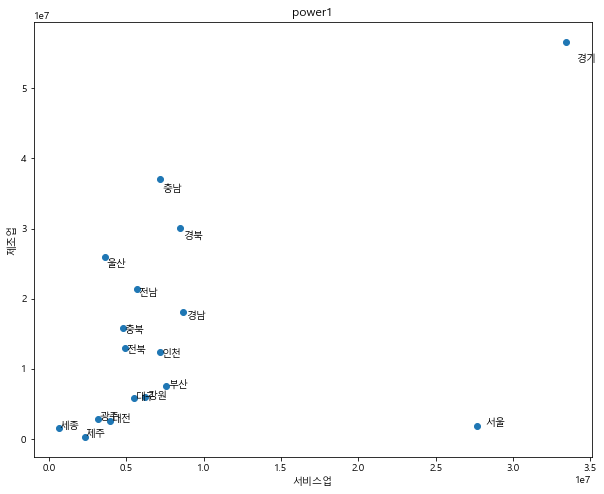

In [142]:
# 서비스업과 제조업의 관계를 보고싶음. (수치 : 전력사용량)
plt.figure(figsize=(10,8)) # 그림사이즈 가로세로 조정
plt.xlabel('서비스업') # lab 이름 지정
plt.ylabel('제조업')
plt.scatter(power1['서비스업'],power1['제조업']) # scatter plot 생성
for n in range(power1.shape[0]): # shape[0] : 행의 수
    plt.text(power1['서비스업'][n]*1.02,power1['제조업'][n]*0.95,power1.index[n]) # *1.02 : 포인트 글자 위치 지정
plt.title('power1') # 그래프명 지정.

Text(0.5,1,'power2 : 서울, 경기 제외')

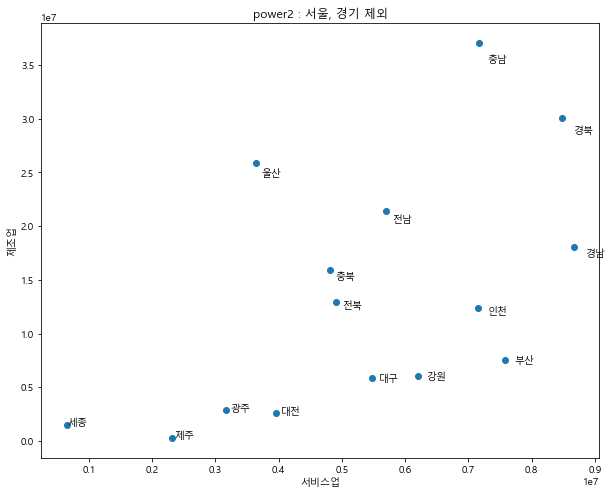

In [146]:
# 서울, 경기라는 이상치(?) 때문에 나머지 지역이 한곳에 뭉쳐있어 보기 힘듬.
power2 = power1.drop(['서울','경기'])
plt.figure(figsize=(10,8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
plt.scatter(power2['서비스업'],power2['제조업'])
for n in range(power2.shape[0]):
    plt.text(power2['서비스업'][n]*1.02,power2['제조업'][n]*0.95,power2.index[n])
plt.title('power2 : 서울, 경기 제외')

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

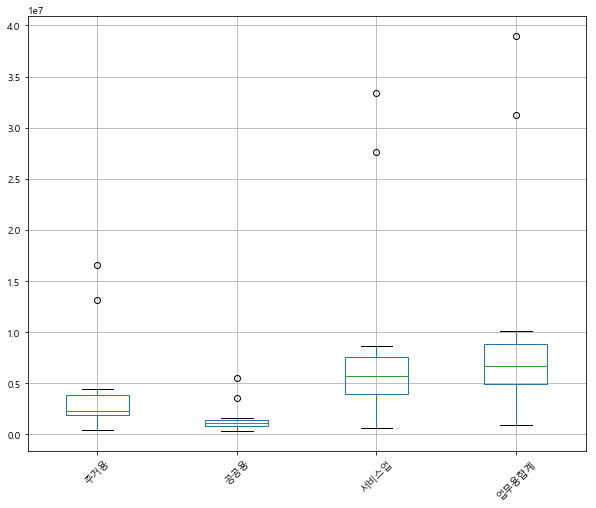

In [131]:
# Box plot
plt.figure(figsize=(10,8))
#power1.boxplot()
power1[['주거용','공공용','서비스업','업무용합계']].boxplot() #보고싶은 열에 대한 Box plot 생성.
plt.xticks(rotation=45) # 글자 각도

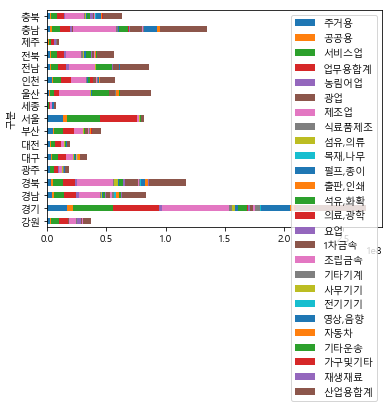

In [136]:
# bar 그래프, barh : bar horizon # stacked : 겹겹이 우측으로 쌓아서 보여라.
power1.plot(kind='barh', stacked=True)

# clustering 연습

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [20.0, 20.0, 52.5, 52.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [36.25, 36.25, 83.75, 83.75],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [60.0, 60.0, 130.0, 130.0]],
 'dcoord': [[0.0, 1710061.974984825, 1710061.974984825, 0.0],
  [0.0, 3043246.288119481, 3043246.288119481, 0.0],
  [1710061.974984825, 4348307.924220294, 4348307.924220294, 3043246.288119481],
  [0.0, 4802848.110011704, 4802848.110011704, 0.0],
  [0.0, 4657254.6127551105, 4657254.6127551105, 4802848.110011704],
  [4348307.924220294,
   9343072.809294693,
   9343072.809294693,
   4657254.6127551105],
  [0.0, 5695128.446028237, 5695128.446028237, 0.0],
  [0.0, 6732731.075477173, 6732731.075477173, 5695128.446028237],
  [0.0, 9716608.53359852, 9716608.53359852, 6732731.075

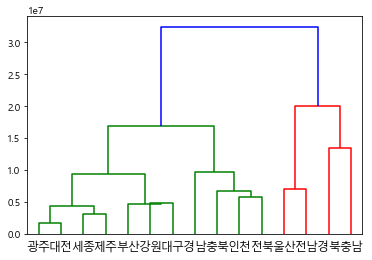

In [171]:
from scipy.cluster.hierarchy import dendrogram, linkage

# metric : clustering 할 땐 비슷한거 끼리 묶어야 됨.
# mothod 뭐 있는지 확인 ( ward가 많이 쓰인다고 함. )
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
link_dist = linkage(power2, metric='euclidean', method='centroid')

dendrogram(link_dist, labels=power2.index)  # dendrogram 생성.

In [173]:
# clustering by KMeans)
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

k =  KMeans(n_clusters=4)
k.fit(power2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [179]:
print(k.labels_) # dendrogram의 그룹을 알 수 있음
# print(k.cluster_centers_)

[1 2 3 1 1 1 1 1 0 2 0 2 1 3 2]


In [180]:
power2['클러스터종류']=k.labels_
power2['클러스터종류'] # 같은 숫자끼리 같은 그룹

구분
강원    1
경남    2
경북    3
광주    1
대구    1
대전    1
부산    1
세종    1
울산    0
인천    2
전남    0
전북    2
제주    1
충남    3
충북    2
Name: 클러스터종류, dtype: int32

In [197]:
power3 = power1.drop(['클러스터종류'],axis=1)
power3.columns

Index(['주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조', '섬유,의류',
       '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속', '조립금속',
       '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계'],
      dtype='object')

Text(0.5,1,'power2')

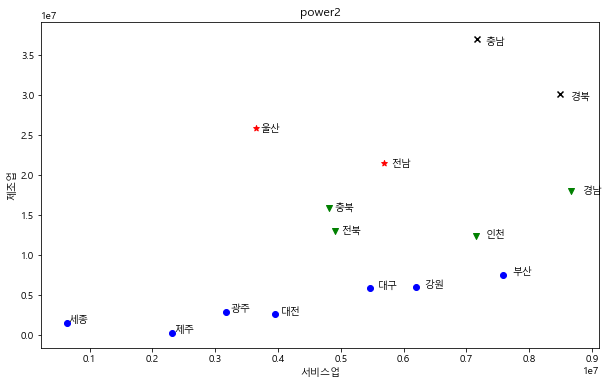

In [202]:
plt.figure(figsize=(10,6))
plt.xlabel('서비스업')
plt.ylabel('제조업')

my_marker = ['*','o','v','x'] # 그룹별 다른 마커 지정.
my_colors = ['r','b','g','k'] # 그룹별 다른 색 지정.

for i in range(4):
    t = power2['클러스터종류']
    xs = power2['서비스업'][t==i]
    ys = power2['제조업'][t==i]
    plt.scatter(xs, ys, marker=my_marker[i], c=my_colors[i])
    
for n in range(power2.shape[0]): # shape[0]은 행의 수, shape[1]은 열의 수.
    plt.text(power2['서비스업'][n]*1.02, power2['제조업'][n]*0.98, power2.index[n])
plt.title('power2')

# iris 실습

![iris](https://www.dropbox.com/s/jfep97cix2ajukk/ml-2.png?raw=1)

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [226]:
X2 = X[:,:2] # extract only the first two columns (0,1) 연습이니 feature 2개만 써봄.

Text(0,0.5,'sepal width')

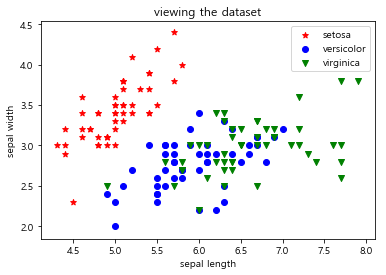

In [239]:
my_marker = ['*','o','v']
my_colors = ['r','b','g']

for i in range(3): # 3 : 종류 수
    xs = X2[:,0][y==i] # 1번째 칼람
    ys = X2[:,1][y==i] # 2번째 칼람
    plt.scatter(xs,ys,marker=my_marker[i],c=my_colors[i])
    
plt. title('viewing the dataset')
plt.legend(iris.target_names)
plt.xlabel('sepal length') # c.f.) Sepal 꽃밭침, Petal 꽃잎
plt.ylabel('sepal width')

In [247]:
y2 = y.copy()
y2[y2==2]=1         # y2==2 인 경우는 y2==1로 한다. (1과 2를 합침.)

Text(0,0.5,'sepal width')

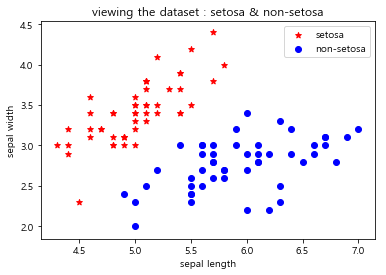

In [252]:
my_marker = ['*','o']
my_colors = ['r','b']

for i in range(2):
    xs = X2[:,0][y==i]
    ys = X2[:,1][y==i]
    plt.scatter(xs,ys,marker=my_marker[i],c=my_colors[i])
    
plt. title('viewing the dataset : setosa & non-setosa')
names=['setosa','non-setosa']
plt.legend(names)
plt.xlabel('sepal length') # c.f.) Sepal 꽃밭침, Petal 꽃잎
plt.ylabel('sepal width')

In [256]:
# 머신러닝
# 두 그룹을 분류하는 선 그리기. y = a + b1x1 + b2x2 : y = -50.09 + 107.48*x1 - 189.25*x2
# ex1) linear classifier
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X2,y2)
model.coef_, model.intercept_

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(array([[ 107.48999428, -189.25100057]]), array([-50.0921937]))

In [277]:
np.random.seed(42) # seed를 42가지고 써라하면 꼭 여기서부터 쓰니까, 똑같은 랜덤 넘버가 생성.(한번하면 그 뒤로 생성값이 같음.)
z = np.random.rand(10,2).round(2)*10
model.predict(z)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [282]:
# ex2) nonlinear classifier using decisiontree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X2 = X[:,:2]
y2 = y.copy()
y2[y2==2]=1

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X2,y2)
dt_model.classes_

array([0, 1])

In [285]:
np.random.seed(42)
z = np.random.rand(10,2).round(2)*10
z, dt_model.predict(z)

# 위 두가지 방법의 결과가 조금은 다르다. 알아서 판단하라.

(array([[3.7, 9.5],
        [7.3, 6. ],
        [1.6, 1.6],
        [0.6, 8.7],
        [6. , 7.1],
        [0.2, 9.7],
        [8.3, 2.1],
        [1.8, 1.8],
        [3. , 5.2],
        [4.3, 2.9]]), array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0]))